# Advanced Control Labor 

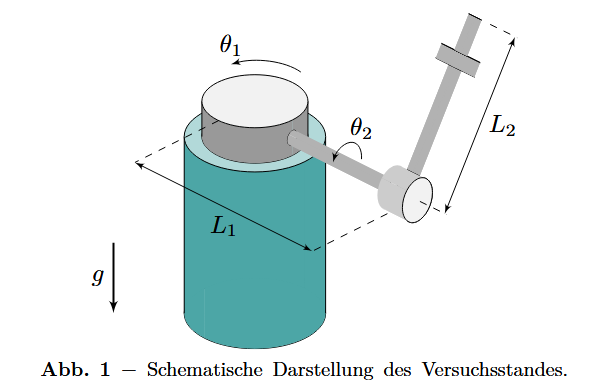

In [1]:
from IPython.display import Image
Image("img/Versuchsaufbau.png")

## Zustandsraummodel

Zunächst wird der Zustand wie folgt festgelegt. 
$
x(t) =
\begin{pmatrix}
x_1(t) \\
x_2(t) \\
x_3(t) \\
x_4(t)
\end{pmatrix}
=
\begin{pmatrix}
\theta_1(t) \\
\dot{\theta}_1(t) \\
\theta_2(t) \\
\dot{\theta}_2(t)
\end{pmatrix}
$

Anschließend lassen wir das Gleichungssystem von sympy lösen:

In [2]:
import sympy as sp
x1, x2, x3, x4, x2dot, x4dot = sp.symbols('x1 x2 x3 x4 x2dot x4dot')
m2, L1, l2, J0, J2, b1, tau, b2, g = sp.symbols('m2 L1 l2 J0 J2 b1 tau b2 g')
eqn1 = sp.Eq(m2*L1*l2*(sp.cos(x3)*x4dot - sp.sin(x3)*x4**2) + J0*x2dot + J2*(sp.sin(x3)**2*x2dot + sp.sin(2*x3)*x2*x4) + b1 , tau)
eqn2 = sp.Eq(m2*L1*l2*sp.cos(x3)*x2dot - J2*(0.5*sp.sin(2*x3)*x2**2 - x4dot) + b2 + m2*l2*g*sp.sin(x3), 0)

In [3]:
A, B, C, D, E, F = sp.symbols('A B C D E F')
#eqn1 = sp.Eq(A*x4dot + B*x4dot**2 + C*x2dot + D, 0)
#eqn2 = sp.Eq(A*x2dot + E*x4dot + F, 0)

# solve eqn2 for x2dot
x2dot_expr = sp.solve(eqn2, x2dot)[0]

# substitute into eqn1
eqn1_sub = eqn1.subs(x2dot, x2dot_expr)

# solve for x4dot
x4dot_solutions = sp.solve(eqn1_sub, x4dot)

# back-substitute to get x2dot solutions
solutions = [
    {
        x4dot: sol,
        x2dot: x2dot_expr.subs(x4dot, sol)
    }
    for sol in x4dot_solutions
]

# Uncomment following line for solution of Linear solver
#solutions

$ \dot{x}_1 =x_2 $

$
\dot{x}_2 =
\frac{
0.5\, J_2 x_2^2 \sin(2.0 x_3)
- J_2
\frac{
0.5\, J_0 J_2 x_2^2 \sin(2.0 x_3)
- J_0 b_2
- J_0 g l_2 m_2 \sin(x_3)
+ J_2^2 x_2^2 \sin(x_3)^3 \cos(x_3)
+ J_2 L_1 l_2 m_2 x_2 x_4 \sin(2.0 x_3) \cos(x_3)
- J_2 b_2 \sin(x_3)^2
- J_2 g l_2 m_2 \sin(x_3)^3
- 0.5\, L_1^2 l_2^2 m_2^2 x_4^2 \sin(2.0 x_3)
+ L_1 b_1 l_2 m_2 \cos(x_3)
- L_1 l_2 m_2 \tau \cos(x_3)
}{
J_0 J_2
+ J_2^2 \sin(x_3)^2
- L_1^2 l_2^2 m_2^2 \cos(x_3)^2
}
- b_2
- g l_2 m_2 \sin(x_3)
}{
L_1 l_2 m_2 \cos(x_3)
}
$


$
\dot{x}_3 = x_4
$

$
\dot{x}_4 =
\frac{
0.5\, J_0 J_2 x_2^2 \sin(2.0 x_3)
- J_0 b_2
- J_0 g l_2 m_2 \sin(x_3)
+ J_2^2 x_2^2 \sin(x_3)^3 \cos(x_3)
+ J_2 L_1 l_2 m_2 x_2 x_4 \sin(2.0 x_3) \cos(x_3)
- J_2 b_2 \sin(x_3)^2
- J_2 g l_2 m_2 \sin(x_3)^3
- 0.5\, L_1^2 l_2^2 m_2^2 x_4^2 \sin(2.0 x_3)
+ L_1 b_1 l_2 m_2 \cos(x_3)
- L_1 l_2 m_2 \tau \cos(x_3)
}{
J_0 J_2
+ J_2^2 \sin(x_3)^2
- L_1^2 l_2^2 m_2^2 \cos(x_3)^2
}
$



## Werte aus bekannten Parametern bestimmen  

Physikalische Konstante:
$g = 9.81 \,\mathrm{m/s^2}$

Geometrie:
$L_1 = 0.155 \,\mathrm{m}$
$L_2 = 0.240 \,\mathrm{m}$
$l_P = 0.1917 \,\mathrm{m}$

Massen:
$m_S = 0.0274 \,\mathrm{kg}$
$m_P = 0 \,\mathrm{kg}$

Trägheitsmoment:
$\hat{J}_1 = 2.89 \cdot 10^{-2} \,\mathrm{kg\,m^2}$

Reibungsparameter Rotor:
$\mu_{V1} = 50.91 \cdot 10^{-2} \,\mathrm{N\,m\,s}$
$\mu_{H1} = 93.58 \cdot 10^{-3} \,\mathrm{N\,m}$

Reibungsparameter Pendel:
$\mu_{V2} = 1.332 \cdot 10^{-5} \,\mathrm{N\,m\,s}$
$\mu_{H2} = 3.018 \cdot 10^{-4} \,\mathrm{N\,m}$

Aktuatorgrenze:
$\tau_{\max} = 4.0 \,\mathrm{N\,m}$
-
Die übrigen Parameter ergeben sich aus:

$m_2 = m_P + m_S$

$\hat{J}_0 = \hat{J}_1 + m_2 \, l_P$

$\hat{J}_2 = \frac{1}{3} m_S L_2^2 + m_P l_P^2$

$l_2 = \frac{L_2}{2}\quad \text{(für } m_P = 0\text{)}$

## Simulieren des Zustandsraummodels

## Parameterbestimmung

Die zu bestimmenden Parameter sind:  
$\micro_{V,2} = \alpha \rightarrow viskose Reibung $  
$\micro_{H,2} = \beta \rightarrow Haftreibung $  
$\micro_{L,p} = \gamma \rightarrow Position Pendelmasse $  

